In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df=pd.read_csv("Prime Classes\\Dataset\\smartcart_customers.csv")

# Data preprocessing


## 1.Handle missing value

In [7]:
df["Income"]=df["Income"].fillna(df["Income"].median())

## Feature Engineering


In [8]:
df["Age"]=2026-df["Year_Birth"]
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)
refrence_date=df["Dt_Customer"].max()
df["Customer_tenure_days"]=(refrence_date-df["Dt_Customer"]).dt.days

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_tenure_days'],
      dtype='object')

In [10]:
#spending 
df["Total_Spending"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [11]:
#childerns
df["Total_children"]=df["Kidhome"]+df["Teenhome"]

In [12]:
#Education
df["Education"].value_counts()
df["Education"]= df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate"
                         ,"Graduation":"Graduate",
                         "Master":"Postgraduate","PhD":"Postgraduate"})

In [13]:
#Marital Status
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner","Together":"Partner"
                         ,"Single":"Alone","Divorced":"Alone","Widow":"Alone","Absurd":"Alone","YOLO":"Alone"})

In [14]:
df["Living_With"].value_counts()


Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

## Drop Columns

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_children,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [16]:
cols=["ID","Year_Birth","Marital_Status","Kidhome","Teenhome","Dt_Customer"]
spending_cols=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
cols_to_drop=cols+spending_cols
df_cleaned=df.drop(columns=cols_to_drop)

In [17]:
df_cleaned.shape

(2240, 15)

In [18]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


## Outliers

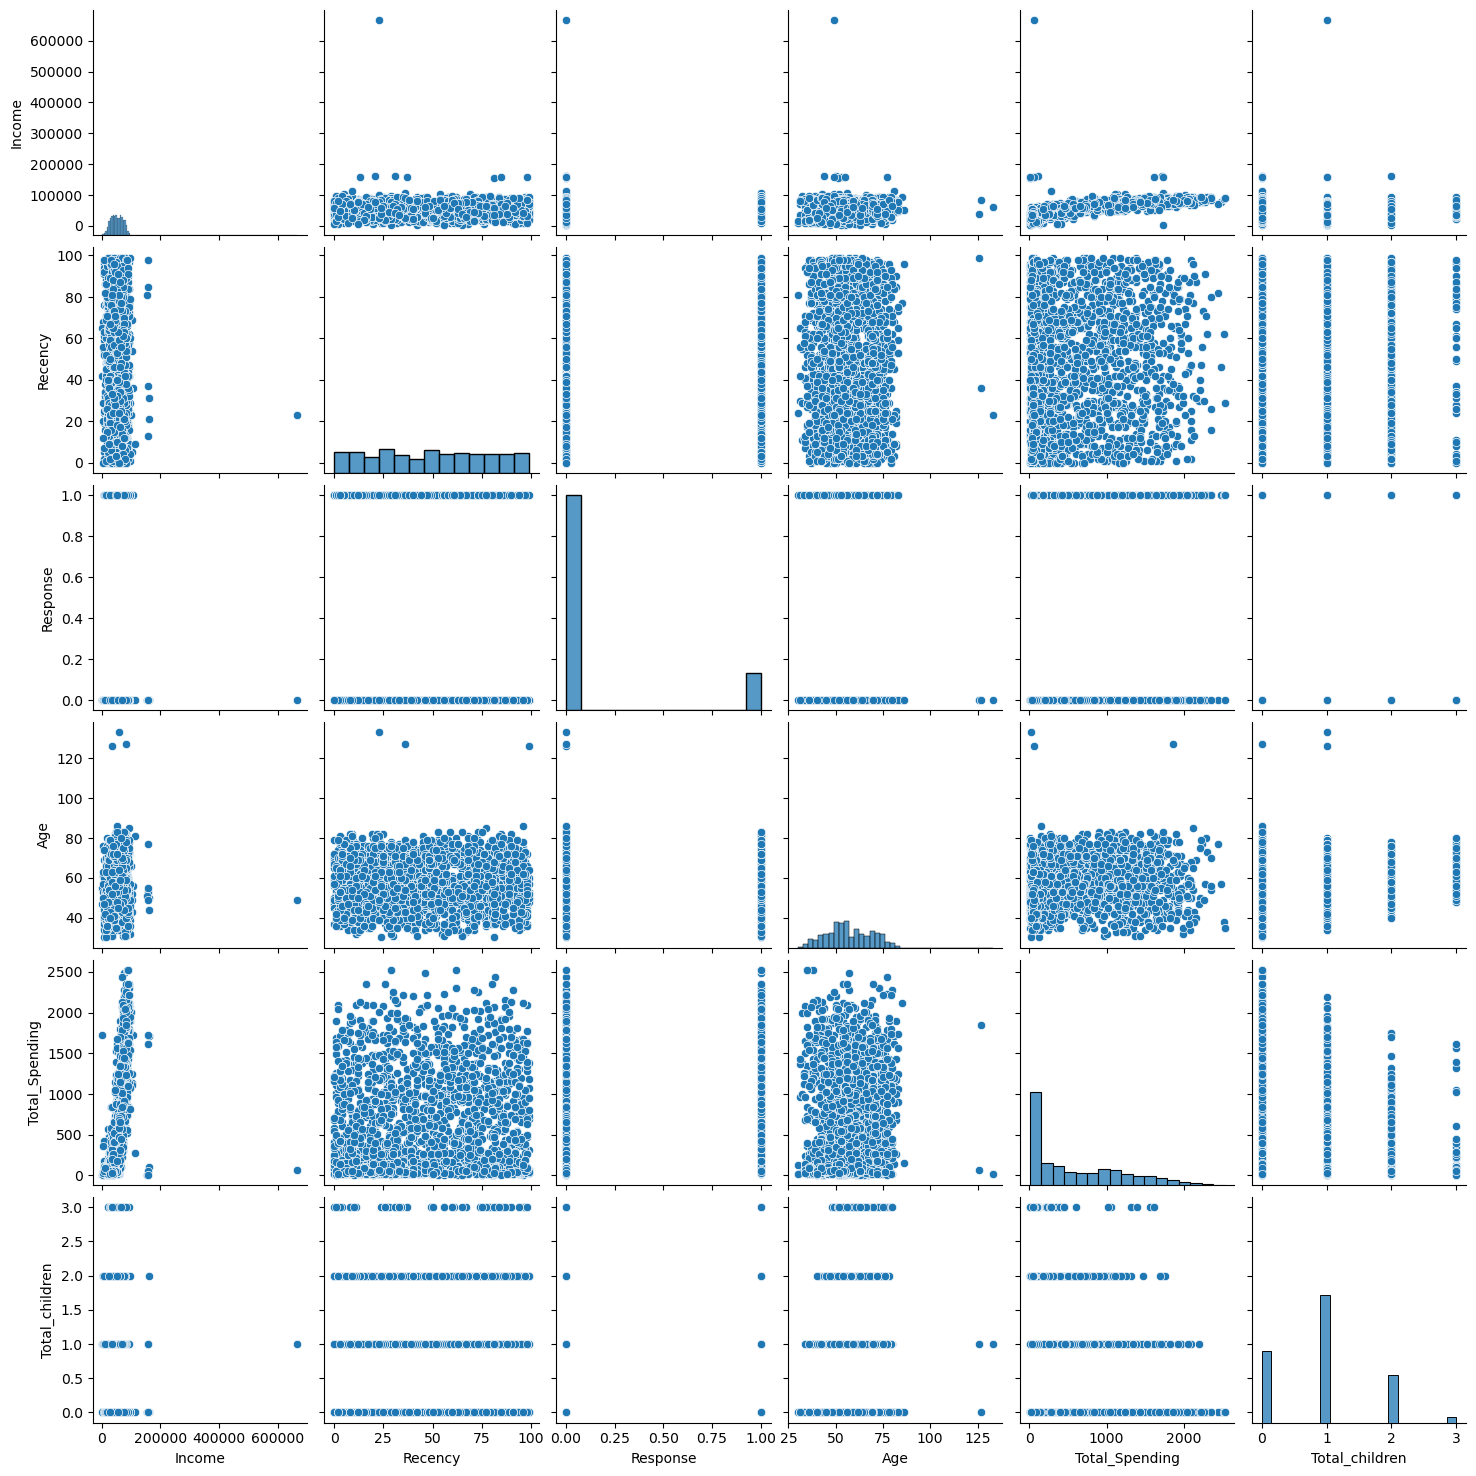

In [19]:
cols=["Income","Recency","Response","Age","Total_Spending","Total_children"]
#relative pair plot
sns.pairplot(df_cleaned[cols])

In [20]:
# Remove Outliers
print("data size with outliers",len(df_cleaned))
df_cleaned=df_cleaned[(df_cleaned["Age"] < 90)]
df_cleaned=df_cleaned[(df["Income"] <600_000)]
print("data size without outliers",len(df_cleaned))


data size with outliers 2240
data size without outliers 2236


C:\Users\91749\AppData\Local\Temp\ipykernel_17752\552449498.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned=df_cleaned[(df["Income"] <600_000)]


## HeatMaps

In [21]:
corr=df_cleaned.corr(numeric_only=True)

<Axes: >

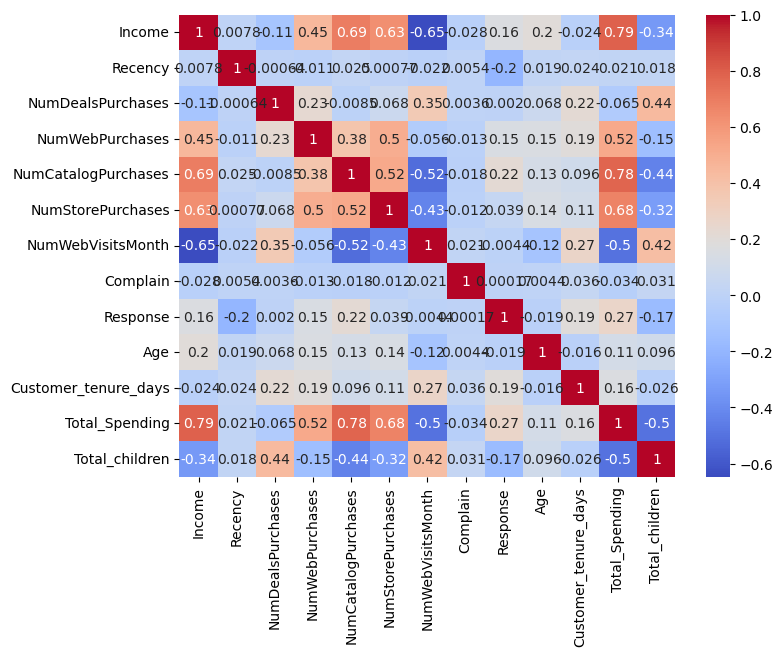

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm"
)

## Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe=OneHotEncoder()
cat_cols=["Education","Living_With"]
encoded_cols=ohe.fit_transform(df_cleaned[cat_cols])

In [25]:
encoded_df=pd.DataFrame(encoded_cols.toarray(),columns=ohe.get_feature_names_out(cat_cols),index=df_cleaned.index)

In [26]:
df_encoded=pd.concat([df_cleaned.drop(columns=cat_cols),encoded_df],axis=1)

# Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
X=df_encoded

In [30]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
X_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
        -0.74204052,  0.74204052],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
        -0.74204052,  0.74204052],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
        -0.74204052,  0.74204052]])

# Visualize

In [32]:
from sklearn.decomposition import PCA

In [33]:
#2D
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_scaled)

In [34]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

Text(0.5, 0.92, '3d projection')

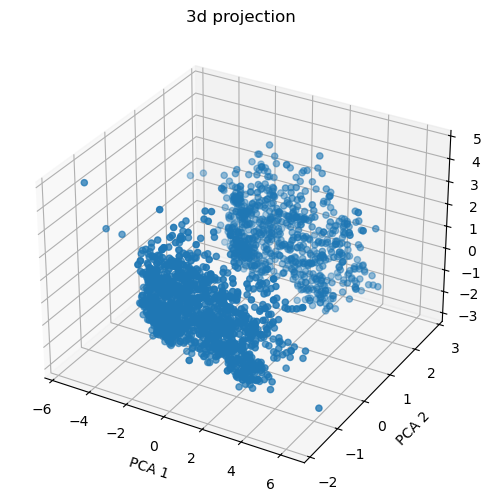

In [35]:
#plot
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2])
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3d projection")


# Analyze K value

## 1. Elbow Method

In [36]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [37]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [42]:
knee=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
optimal_k=knee.elbow

In [43]:
print("Best K:",optimal_k)

Best K: 4


Text(0, 0.5, 'Wcss')

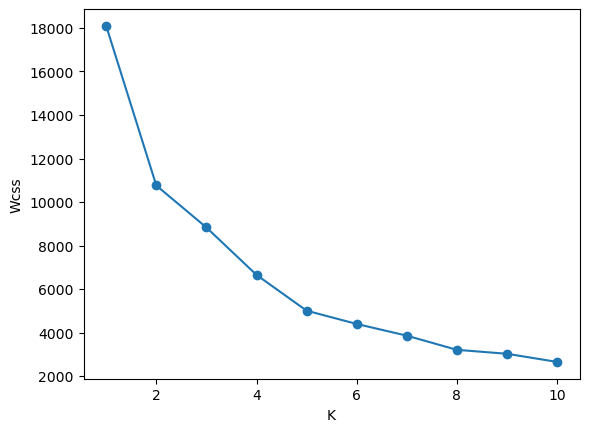

In [45]:
#Plot
plt.plot(range(1,11),wcss,marker="o")
plt.xlabel("K")
plt.ylabel("Wcss")

## Slihouette Score

Text(0, 0.5, 'Scores')

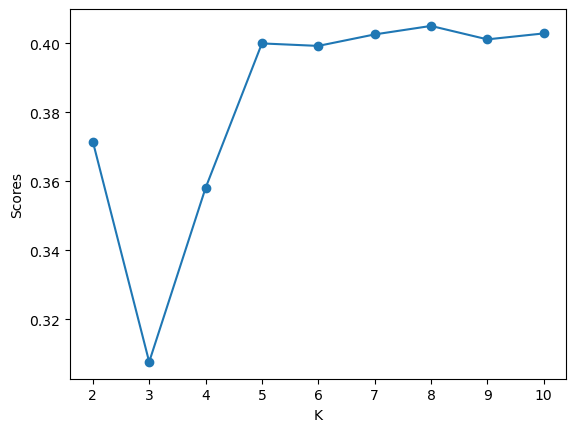

In [46]:
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(X_pca)
    score=silhouette_score(X_pca,labels)
    scores.append(score)

#Plot
plt.plot(range(2,11),scores,marker="o")
plt.xlabel("K")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

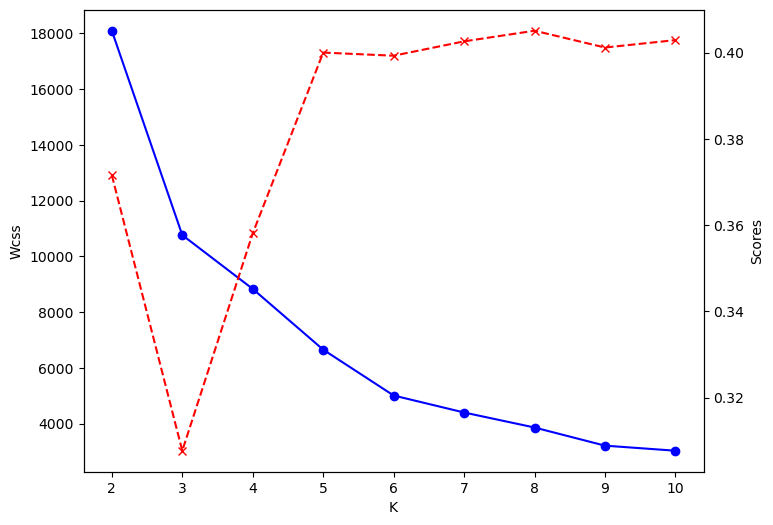

In [51]:
#combined plot
k_range=range(2,11)
fig,ax1=plt.subplots(figsize=(8,6))
ax1.plot(k_range,wcss[:len(k_range)],marker="o",color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("Wcss")

ax2=ax1.twinx()
ax2.plot(k_range,scores[:len(k_range)],marker="x",color="red",linestyle="--")
ax2.set_ylabel("Scores")

# Clustering

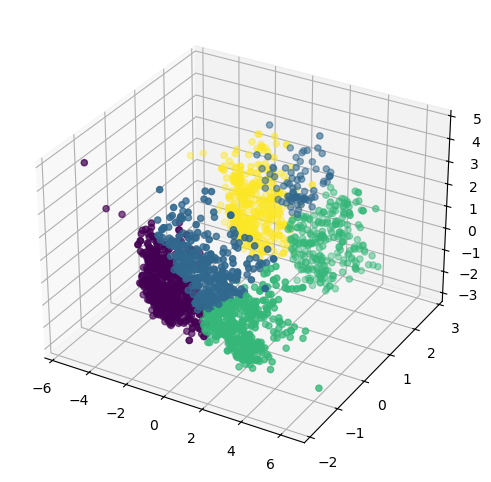

In [52]:
# K_means
kmeans=KMeans(n_clusters=4,random_state=42)
labels_kmeans=kmeans.fit_predict(X_pca)
#plot
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labels_kmeans)

In [54]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

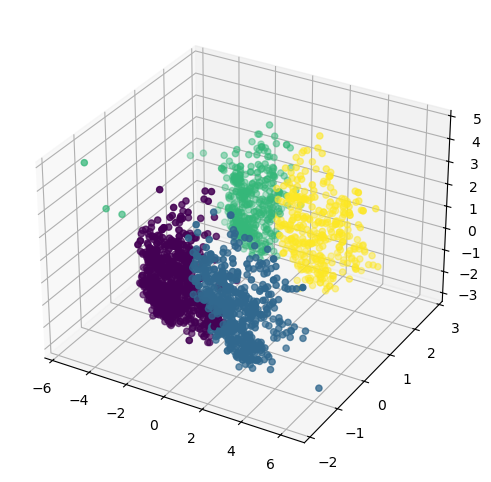

In [55]:
agg_clg=AgglomerativeClustering(n_clusters=4,linkage="ward")
labels_agg=agg_clg.fit_predict(X_pca)
#plot
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labels_agg)


# Characterization of Clusters

In [75]:

X["Clusters"]=labels_agg

In [76]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Clusters
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='Clusters', ylabel='count'>

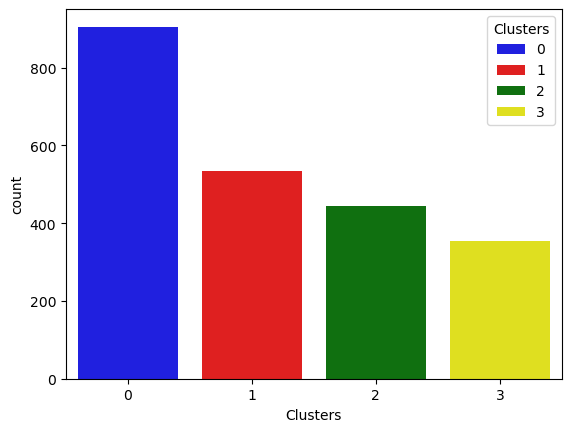

In [77]:
pal=["blue","red","green","yellow"]
sns.countplot(x=X["Clusters"],palette=pal,hue=X["Clusters"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

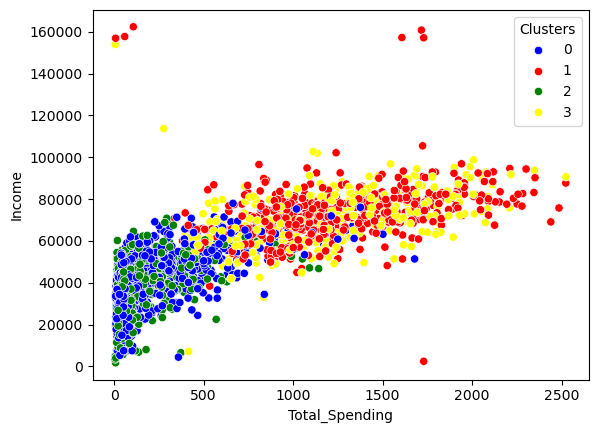

In [78]:
# income & Spending Patterns
sns.scatterplot(x=X["Total_Spending"],y=X["Income"],hue=X["Clusters"],palette=pal)

In [81]:
# Cluster Summary
cluster_summary=X.groupby("Clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
Clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
Clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        Age  Customer_tenure_days  Total_Spending  \
Clu